In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


In [20]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


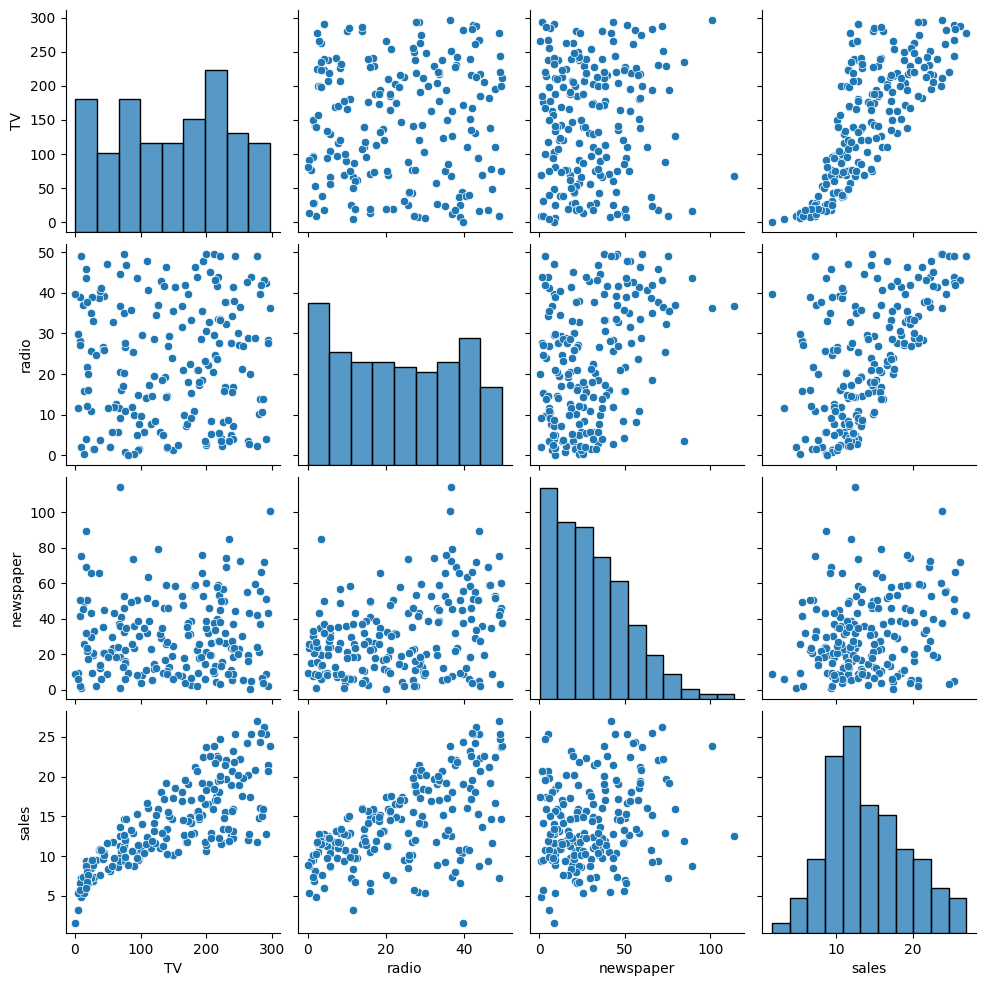

In [21]:
sns.pairplot(data=df)

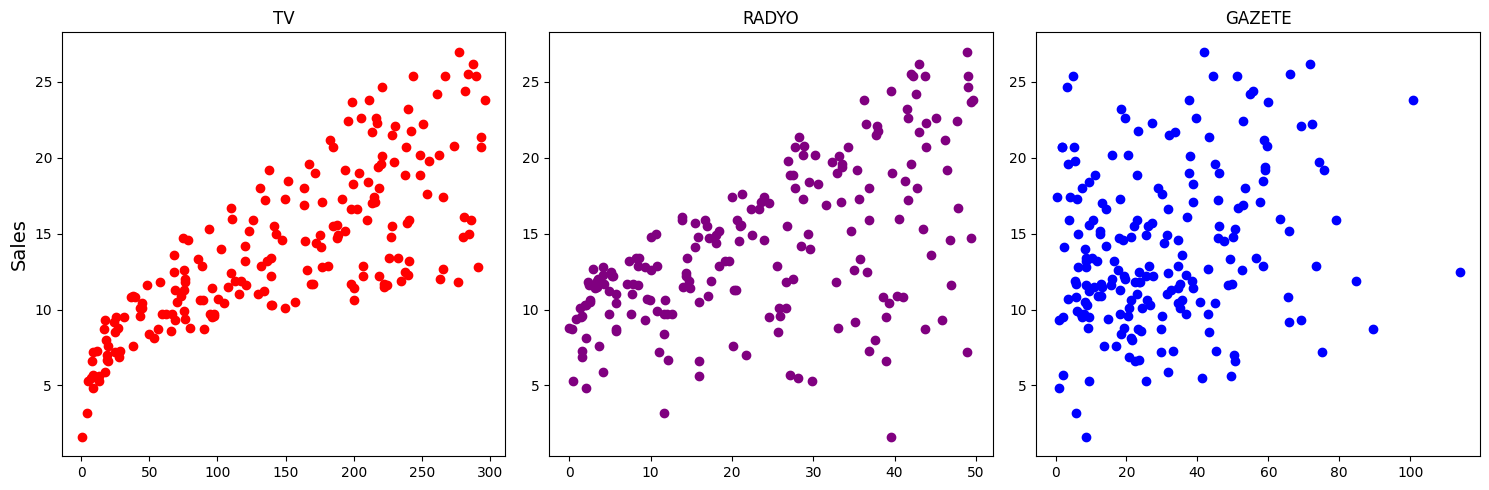

In [22]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(df["TV"], df["sales"], "o", color="red")
ax[0].set_ylabel("Sales", size=14)
ax[0].set_title("TV")

ax[1].plot(df["radio"], df["sales"], "o", color="purple")
ax[1].set_title("RADYO")

ax[2].plot(df["newspaper"], df["sales"], "o", color="blue")
ax[2].set_title("GAZETE")

plt.tight_layout()

In [23]:
X = df.drop("sales", axis=1)
y = df["sales"]

In [24]:
train_rmse = []
test_rmse = []

for d in range(1,10):
    
    poly_conv = PolynomialFeatures(degree=d, include_bias=False)
    poly_feat = poly_conv.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse.append(train_RMSE)
    test_rmse.append(test_RMSE)

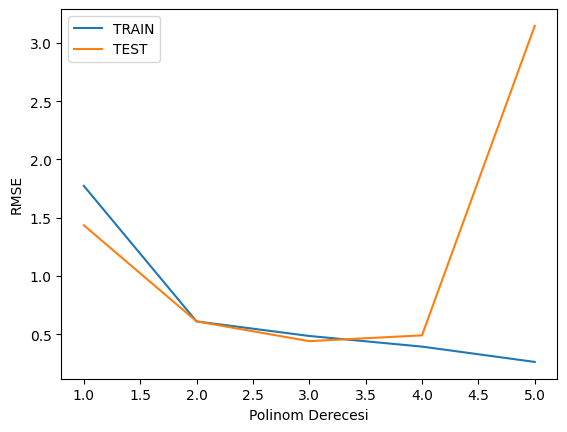

In [25]:
plt.plot(range(1,6),train_rmse[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse[:5],label='TEST')
plt.xlabel("Polinom Derecesi")
plt.ylabel("RMSE")
plt.legend()

In [26]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
poly_regr_2 = LinearRegression()
poly_regr_2.fit(X_poly, y)
poly_pred_2 = poly_regr_2.predict(X_poly)

In [27]:
print("R^2 :       ", round(r2_score(y,poly_pred_2),4))
print("MAE :       ", round(mean_absolute_error(y,poly_pred_2),4))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y,poly_pred_2)),4))

R^2 :        0.9947
MAE :        0.274
RMSE :       0.3778
